Name: Jonathan Mazurkiewicz <BR>
Z#: Z23641903 <br>
Link: https://colab.research.google.com/drive/1cSvNsR8Rehik5bu5Wj6hM8-gV_UgFxGZ?usp=sharing<br>
Assignment 2 <br>

NOTE: Comments are cut off in the PDF. Please view the link to see comments. <br>I will fix this for next time by commenting new lines.


### PROBLEM 1
NOTE: I chose to use Excel to write my formulas and took a screen shot. <br>
All of my work is shown appropriately, with explanations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

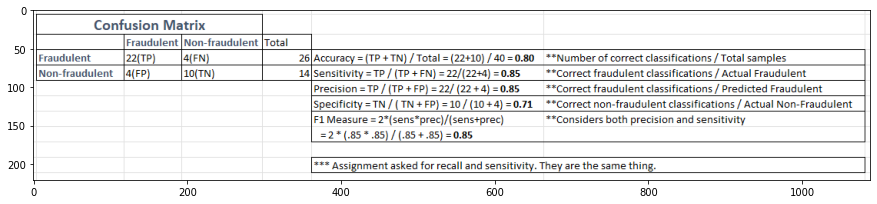

In [ ]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
img = mpimg.imread('/content/drive/MyDrive/Question 1.png')
plt.figure(figsize = (15, 10))
plt.imshow(img)

The number of images in the training set is 60000
The number of images in the testing set is 10000
The images are 28 by 28 pixels.


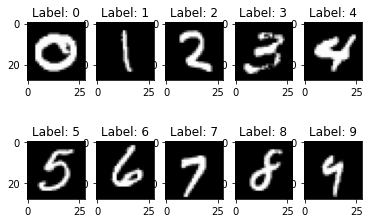

In [ ]:
# PROBLEM 2

from keras.datasets import mnist

subplot_index = 1

                                                                                            ### Used in part B/C/G
def output_images(x_train, y_train, digit, subplot_index):                                  ### Function declaration: INPUT (image, label, key) OUTPUT none
  x_train_digit = x_train[y_train == digit, :, :]                                           ### seperate the training data to only include those with the label we want, starting at 0
  x_train_i = x_train_digit[np.random.randint(0,100),:,:]                                   ### pick an image out of the seperated data !! Needed to use randint to satisfy part G
  plt.subplot(2,5,subplot_index)                                                            ### Plot the image as part of a subplot
  plt.imshow(x_train_i, cmap= 'gray')
  plt.title("Label: " + str(digit))
                                                                                            ### Used in part I
def accuracy(images, label, attribute, threshold):                                          ### Training accuracy function. Compares the attribute to the threshold and places into two
  num_correct = 0                                                                           ### predicted classes, then checks that prediction against the actual label.
  for i in range(len(images)):                                                              ### Returns # correct / # images
    if attribute[i] < threshold:
      predicted = 0
    else:
      predicted = 8
    if predicted == label[i]:
      num_correct += 1
  return num_correct / len(images)


(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_train_img = x_train.shape[0]                                                            ### Shuffling the data before we begin
train_ind = np.arange(0,num_train_img)
train_ind_s = np.random.permutation(train_ind)

x_train = x_train[train_ind_s, :, :]
y_train = y_train[train_ind_s]

plt.figure()


for i in range(10):                                                                         ### Answer to part B/C -- looping to create a subplot of 10 distinct images
  output_images(x_train, y_train, i, subplot_index)
  subplot_index += 1


print("The number of images in the training set is", x_train.shape[0])                      ###Answer to part A -- using shape to find the number of images and their width/height
print("The number of images in the testing set is", x_test.shape[0])
print("The images are", x_test.shape[1], "by", x_test.shape[2], "pixels.")

In [ ]:
x_train_01 = x_train[np.logical_or(y_train == 0, y_train == 8), : , :]                      ### Answer to part D -- Seperating x_train into a numpy array with only 0's and 8's, with the associated labels
y_train_01 = y_train[np.logical_or(y_train == 0, y_train == 8)]

x_test_01 = x_test[np.logical_or(y_test == 0, y_test == 8), :, :]                           ### Seperating x_test into a numpy array with only 0's and 8's, with the associated labels
y_test_01 = y_test[np.logical_or(y_test == 0, y_test == 8)]

x_valid_01 = x_train_01[0:500, :, :]                                                        ### Answer to part E -- Seperating x_train_01 into training and validation sets
y_valid_01 = y_train_01[0:500]                                                              ### Data has already been shuffled. The first 500 images belong to the validation set
                                                                                            ### While the rest belong to the training set, with no overlap
x_train_01 = x_train_01[500:, :, :]
y_train_01 = y_train_01[500:]

print("The number of images in the training set of 0\'s and 8\'s is", x_train_01.shape[0])  ### Answer to part F -- Output size of the training, validation, and testing sets
print("The number of images in the validation set of 0\'s and 8\'s is", x_valid_01.shape[0])
print("The number of images in the testing set of 0\'s and 8\'s is", x_test_01.shape[0])
                                                                                            ### Answer to part G --


The number of images in the training set of 0's and 8's is 11274
The number of images in the validation set of 0's and 8's is 500
The number of images in the testing set of 0's and 8's is 1954


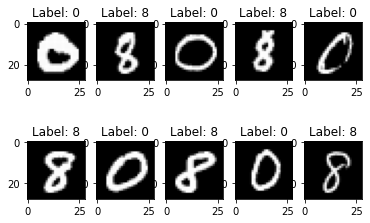

In [ ]:
subplot_index = 1                                                                           ### In order to make the above function work for both parts B/C and G, subplot_index was needed to help index through properly.
plt.figure()                                                                                ### 5 images of each category were selected to be placed in the subplot
for i in range(5):
  output_images(x_valid_01, y_valid_01, 0, subplot_index)                                   ### For each iteration of the loop, one image of label '0' and one image of label '8' will be added to the subplot
  subplot_index += 1                                                                        ### from the validation set of 0's and 8's
  output_images(x_valid_01, y_valid_01, 8, subplot_index)
  subplot_index += 1

x_train_01_center = x_train_01[:,12:16, 12:16]                                              ### Answer to part H -- Splitting the testing, validation, and training sets into 4x4 center pixels, respectively
x_valid_01_center = x_valid_01[:,12:16, 12:16]
x_test_01_center = x_test_01[:,12:16, 12:16]

features_train = np.sum(x_train_01_center, axis = 2)                                        ### Summing and averaging the center 4x4 pixels in each of the 3 sets to form an attribute.
features_train = np.sum(features_train, axis = 1)/16

features_valid = np.sum(x_valid_01_center, axis = 2)
features_valid = np.sum(features_valid, axis = 1)/16


features_test = np.sum(x_test_01_center, axis = 2)
features_test = np.sum(features_test, axis = 1)/16



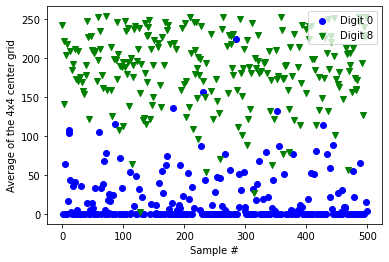

The accuracy of the training set is 0.9395068298740464
The accuracy of the validation set is 0.962
The accuracy of the testing set is 0.9585465711361311


In [ ]:
fig, ax = plt.subplots()                                                                    ### Answer to part I -- Graphing the validation set based upon labels


o_indices = y_valid_01[:500] == 0
ax.scatter(np.arange(500)[o_indices], features_valid[:500][o_indices], c='blue', marker='o', label='Digit 0')
eight_indices = y_valid_01[:500] == 8
ax.scatter(np.arange(500)[eight_indices], features_valid[:500][eight_indices], c='green', marker='v', label='Digit 8')
ax.set_xlabel('Sample #')
ax.set_ylabel('Average of the 4x4 center grid')
ax.legend(loc = 'upper right')

plt.show()


training_accuracy = accuracy(x_train_01, y_train_01, features_train, 90)                   ### Answer to part K -- calling the accuracy function 3 times with the different numpy arrays and the guessed threshold
print("The accuracy of the training set is", training_accuracy)

validation_accuracy = accuracy(x_valid_01, y_valid_01, features_valid, 90)
print("The accuracy of the validation set is", validation_accuracy)

testing_accuracy = accuracy(x_test_01, y_test_01, features_test, 90)
print("The accuracy of the testing set is", testing_accuracy)